# Исследование базы данных сервиса для чтения книг по подписке

**Цель исследования:** исследование базы данных сервиса для дальнейшего формирования предложения для нового продукта.

Исследование пройдет в два этапа:
1. Обзор данных
2. Исследование информации о книгах, издательствах, авторах и отзывах/оценках пользователей на книги.

**Описание данных**

Таблица books - содержит данные о книгах:
- book_id — идентификатор книги;
- author_id — идентификатор автора;
- title — название книги;
- num_pages — количество страниц;
- publication_date — дата публикации книги;
- publisher_id — идентификатор издателя.

Таблица authors - содержит данные об авторах:
- author_id — идентификатор автора;
- author — имя автора.

Таблица publishers - содержит данные об издательствах:
- publisher_id — идентификатор издательства;
- publisher — название издательства;

Таблица ratings - содержит данные о пользовательских оценках книг:
- rating_id — идентификатор оценки;
- book_id — идентификатор книги;
- username — имя пользователя, оставившего оценку;
- rating — оценка книги.

Таблица reviews - содержит данные о пользовательских обзорах:
- review_id — идентификатор обзора;
- book_id — идентификатор книги;
- username — имя автора обзора;
- text — текст обзора.

**Схема данных**
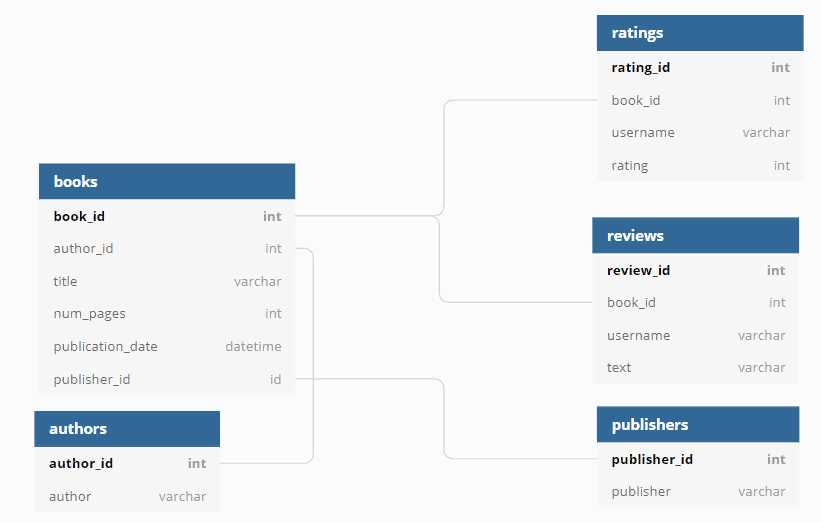

In [1]:
import pandas as pd
import sqlalchemy as sa

In [2]:
# доступ к базе данных
# устанавливаем параметры
db_config = {
    'user': 'praktikum_student', # имя пользователя 
    'pwd': 'Sdf4$2;d-d30pp', # пароль 
    'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net', 
    'port': 6432, # порт подключения
    'db': 'data-analyst-final-project-db' # название базы данных
}

connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)

# сохраняем коннектор
engine = sa.create_engine(connection_string, connect_args={'sslmode':'require'})

In [3]:
# чтобы выполнить SQL-запрос, пишем функцию с использованием Pandas
def get_sql_data(query:str, engine:sa.engine.base.Engine=engine) -> pd.DataFrame:
    '''Открываем соединение, получаем данные из sql, закрываем соединение'''
    with engine.connect() as con:
        return pd.read_sql(sql=sa.text(query), con = con)

### Обзор данных

In [4]:
# функция для вывода информации о таблице - название, количество строк и 5 первых строк
def table_sql(table):
    # вывод первых 5 строк
    query = '''SELECT * FROM ''' + table + ''' LIMIT 5'''
    a = get_sql_data(query)
    
    # количество строк в таблице
    query_count = '''SELECT COUNT(*) FROM ''' + table
    b = get_sql_data(query_count)
    
    # вывод названия и количества строк
    print('Таблица:', table)
    print('Количество строк в таблице:', b['count'][0])
    return a

In [5]:
# создадим список с названиями таблиц
list_tables = ['books', 'authors', 'publishers', 'ratings', 'reviews']

In [6]:
# для каждой таблицы из списка выведем количество строк и 5 первых строк таблицы
for i in list_tables:
    display(table_sql(i))

Таблица: books
Количество строк в таблице: 1000


,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


Таблица: authors
Количество строк в таблице: 636


,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


Таблица: publishers
Количество строк в таблице: 340


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


Таблица: ratings
Количество строк в таблице: 6456


,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


Таблица: reviews
Количество строк в таблице: 2793


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


В базе данных 5 таблиц - 'books', 'authors', 'publishers', 'ratings', 'reviews':
- в таблице 'books' содержится информация о книгах - 1000 строк;
- в таблице 'authors' содержится информация об авторах - 636 строк;
- в таблице 'publishers' содержится информация об издательствах - 340 строк;
- в таблице 'ratings' содержится информация о пользовательских оценках книг - 6456 строк;
- в таблице 'reviews' содержится информация о пользовательских обзорах книг - 2793 строк.

### Анализ базы данных

#### Cколько книг вышло после 1 января 2000 года

Посчитаем, сколько книг вышло после 1 января 2000 года.

In [7]:
# создадим запрос
query = '''

SELECT COUNT(book_id)
FROM books
WHERE publication_date > '2000-01-01'

'''
print('Количество книг, опубликованных после 01.01.2000:', get_sql_data(query)['count'][0])

Количество книг, опубликованных после 01.01.2000: 819


#### Количество обзоров и средняя оценка

Для каждой книги посчитаем количество обзоров и среднюю оценку.

In [8]:
# создадим запрос
query = '''

SELECT title,
       COUNT(DISTINCT review_id) AS count_review,
       ROUND(AVG(rating), 2) AS avg_rating
FROM books AS b
LEFT OUTER JOIN reviews as rev ON b.book_id = rev.book_id
LEFT OUTER JOIN ratings as rat ON b.book_id = rat.book_id
GROUP BY b.book_id
ORDER BY title

'''
get_sql_data(query)

,title,count_review,avg_rating
0,'Salem's Lot,2,3.67
1,1 000 Places to See Before You Die,1,2.50
2,13 Little Blue Envelopes (Little Blue Envelope...,3,4.67
3,1491: New Revelations of the Americas Before C...,2,4.50
4,1776,4,4.00
...,...,...,...
995,Wyrd Sisters (Discworld #6; Witches #2),3,3.67
996,Xenocide (Ender's Saga #3),3,3.40
997,Year of Wonders,4,3.20
998,You Suck (A Love Story #2),2,4.50


#### Издательство, которое выпустило наибольшее число книг толще 50 страниц

Определим издательство, которое выпустило наибольшее число книг толще 50 страниц - таким образом, исключим из анализа брошюры.

In [9]:
# создадим запрос
query = '''

SELECT publisher
FROM books AS b
LEFT OUTER JOIN publishers as p ON b.publisher_id = p.publisher_id
WHERE num_pages > 50
GROUP BY p.publisher_id
ORDER BY COUNT(book_id) DESC
LIMIT 1

'''
print('Издательство, которое выпустило наибольшее число книг толще 50 страниц:', get_sql_data(query)['publisher'][0])

Издательство, которое выпустило наибольшее число книг толще 50 страниц: Penguin Books


#### Автор с самой высокой средней оценкой книг

Определим автора с самой высокой средней оценкой книг, при этом будем учитывайть только книги с 50 и более оценками.

In [10]:
query = '''

WITH avg_rating_books AS
(SELECT author,
       title,
       AVG(rating) AS avg_rating
FROM books AS b
LEFT OUTER JOIN ratings as rat ON b.book_id = rat.book_id
LEFT OUTER JOIN authors as a ON b.author_id = a.author_id
GROUP BY b.book_id, a.author_id
HAVING COUNT(rating) >= 50
ORDER BY AVG(rating) DESC)

SELECT author, AVG(avg_rating)
FROM avg_rating_books
GROUP BY author
ORDER BY AVG(avg_rating) DESC
LIMIT 1

'''
print('Автор с самой высокой оценкой книг (книга имеет 50 и более оценок):', get_sql_data(query)['author'][0])

Автор с самой высокой оценкой книг (книга имеет 50 и более оценок): J.K. Rowling/Mary GrandPré


#### Среднее количество обзоров от пользователей

Посчитаем среднее количество обзоров от пользователей, которые поставили больше 48 оценок.

In [11]:
# создадим запрос
query = '''
     
SELECT AVG(users_rev.count)
FROM (
    SELECT username,
           COUNT(review_id)
    FROM reviews
    WHERE username IN (
             SELECT username
             FROM ratings
             GROUP BY username
             HAVING COUNT(rating_id) > 48)
    GROUP BY username) AS users_rev

'''
get_sql_data(query)
print('Среднее количество обзоров от пользователей, которые поставили больше 48 оценок:', get_sql_data(query)['avg'][0])

Среднее количество обзоров от пользователей, которые поставили больше 48 оценок: 24.0


### Выводы

Проанализировали данные из базы сервиса для чтения книг по подписке. Получили следующие результаты:
- количество книг, опубликованных после 01.01.2000, - 819;
- для каждой книги посчитали количество обзоров и среднюю оценку;
- издательство, которое выпустило наибольшее число книг толще 50 страниц, - Penguin Books;
- автор с самой высокой оценкой книг (книга имеет 50 и более оценок) - J.K. Rowling/Mary GrandPré;
- среднее количество обзоров от пользователей, которые поставили больше 48 оценок, - 24.0.

**Рекомендации заказчику:**
1. стимулировать пользователей, чтобы они ставили оценки и писали отзывы на те книги, у которых нет оценок и отзывов
2. обратить внимание на книги с низким рейтингом и не добавлять в библиотеку данных/похожих авторов